<a href="https://colab.research.google.com/github/kartikparlikar/Alma_Better-HOTEL-BOOKING-ANALYSIS/blob/main/HOTEL_BOOKING_ANALYSIS_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.***



---



#***Importing packages*** 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ***Mounting the drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Reading the data file from the drive.***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

# ***we will create a copy of our original data***

In [ ]:
df1 = df

# ***let's check the data.***

In [ ]:
df1.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


# ***Checking the shape of the data.***

In [ ]:
df1.shape

(119390, 32)

# ***Checking the values count and datatypes of the coloumns.***

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# ***Now we will understand the numerical information of our data.***

In [ ]:
df1.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


# ***Here we are cheaking null values in each columns***

In [ ]:
df1.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni



```
# there are four columns containing the null values namely country, agent, company and children.
```



# ***Here we have created a heatmap for null values so that we can get an idea of null values.***

<function matplotlib.pyplot.show(*args, **kw)>

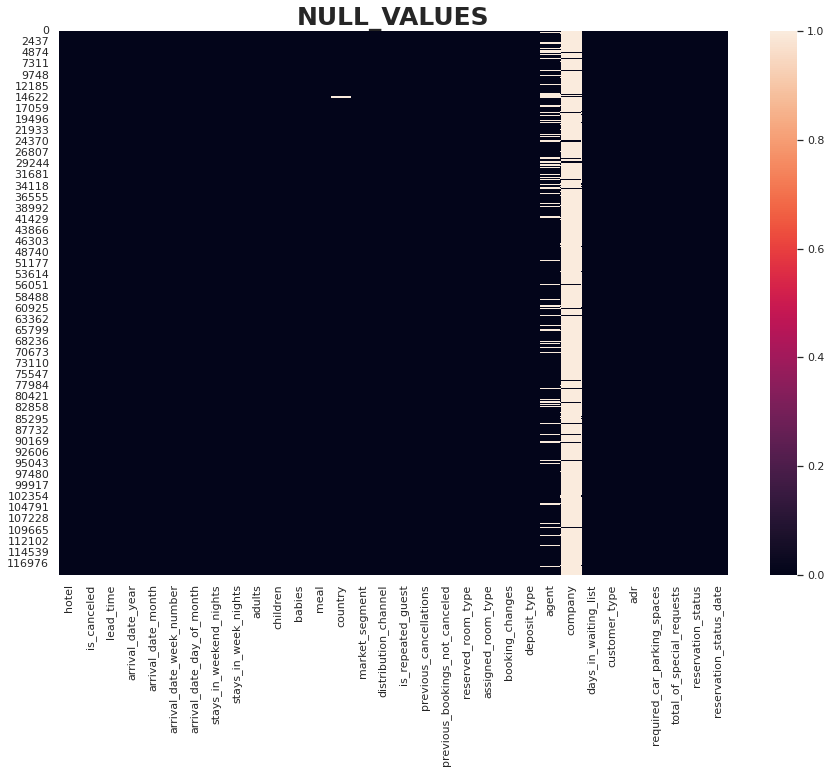

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.isnull())
plt.title('NULL_VALUES',fontweight='bold',fontsize=25)
plt.show

# ***We will replace or fill these null values***

*Filling null values with 0 of company column*.

In [ ]:
df1['company'].fillna(0,inplace=True)

---                                                 

*Filling null values with 0 of agent column.*

In [ ]:
df1['agent'].fillna(0,inplace=True)

---

*filling the null values with others in country coloumn.*

In [ ]:
df1['country'].fillna('others',inplace=True)

---

*Filling null values with its mean value of children column.*

In [ ]:
df1['children'].fillna(df1['children'].mean(),inplace=True)

---

In [ ]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# ***Now we will check duplicate data***

In [ ]:
df1[df1.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,0.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


*We see that there are 31994 duplicate observations.*

# ***Now we will remove duplicate data which can affect the data analysis***

In [ ]:
df1.drop_duplicates(inplace=True)

# ***Now we see the final shape of our data***

In [ ]:
df1.shape

(87396, 32)

# ***Heatmap of numeric variables***

<function matplotlib.pyplot.show(*args, **kw)>

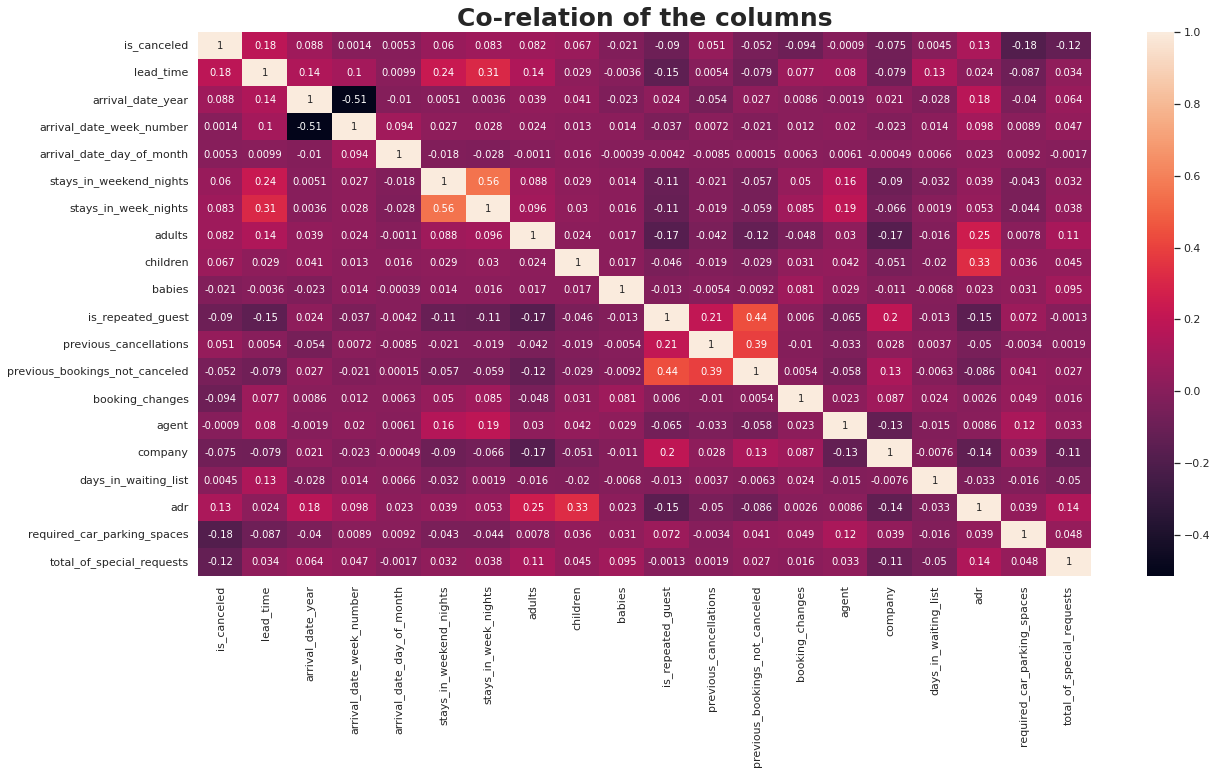

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Co-relation of the columns',fontweight='bold',fontsize=25)
plt.show

# ***Type of Hotels preferred***

In [ ]:
hotel = df1['hotel'].value_counts()
hotel

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

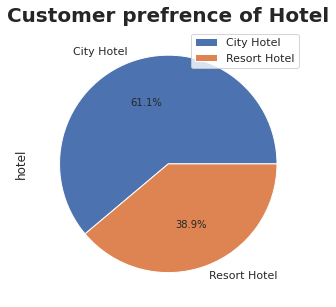

In [ ]:
plt.figure(figsize=(10,5))
hotel.plot.pie(x='City Hotel ',y='Resort Hotel', autopct='%1.1f%%')
plt.legend() 
plt.title('Customer prefrence of Hotel',fontweight="bold", size=20)
plt.show()




> **As we can see the most of the Guests/customer prefferd City hotel over the resort hotel**



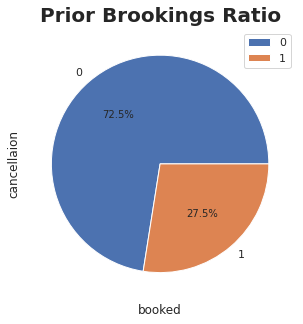

In [ ]:
plt.figure(figsize=(10,5))
df1['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend() 
plt.title('Prior Brookings Ratio',fontweight="bold", size=20)
plt.xlabel("booked")
plt.ylabel("cancellaion")
plt.show()

# ***Cancellations rates by hotel types and lead time***

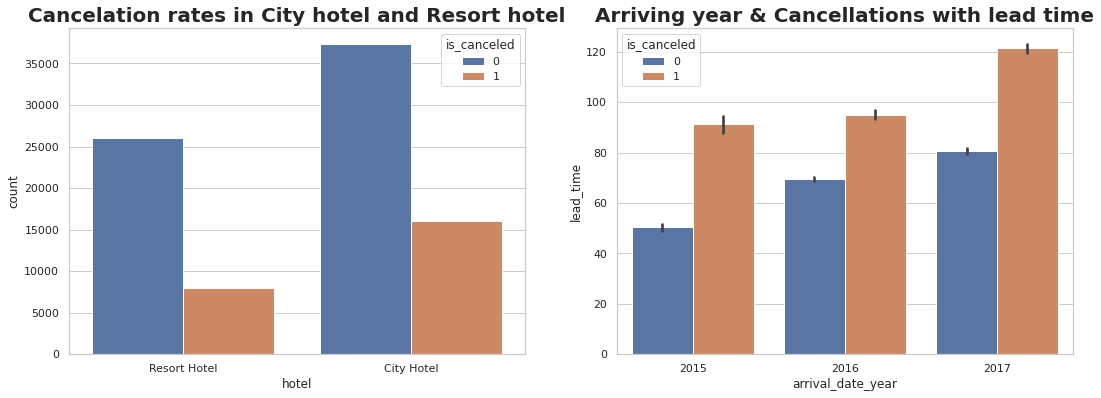

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=df1)
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)

plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df1)
plt.title('Arriving year & Cancellations with lead time',fontweight="bold", size=20)
plt.show()




> **Cancellations rates by hotel types and lead time**


> **With more lead time there is more possibility of booking cancellation.**





# ***Type of Meal prefrence***

># **Hotel Meals abbreviations and their full forms**

*   *BB --bed and breakfast.*
*   *SC -- self-catering*
*   *HB --half board (in which breakfast and dinner are included.)*
*   *FB--full board (in which breakfast, lunch and dinner are included.)*
*   *undefined  -- undefined*



In [ ]:
meal = df1['meal'].value_counts()

Text(0.5, 1.0, 'Preferred Meal')

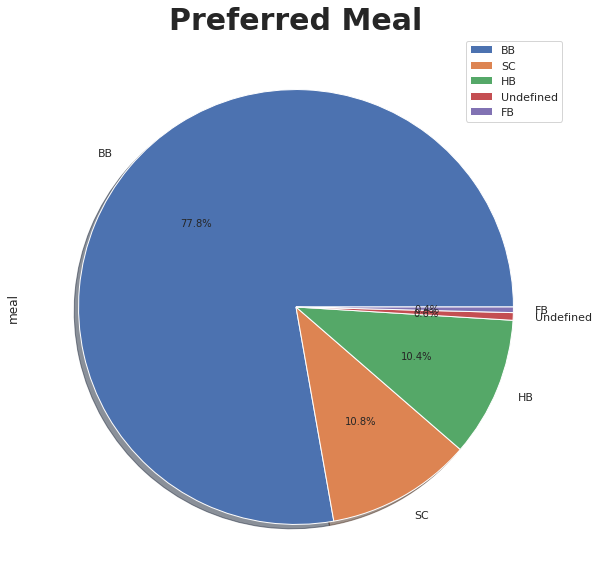

In [ ]:
plt.figure(figsize=(10,10))
df1['meal'].value_counts().plot.pie(autopct='%1.1f%%',shadow = True)
plt.legend() 
plt.title('Preferred Meal',fontweight="bold", size=30)



> # The most prefered is meal 'BB' type of meal


*  BB --bed and breakfast.

# ***Number of bookings country wise***

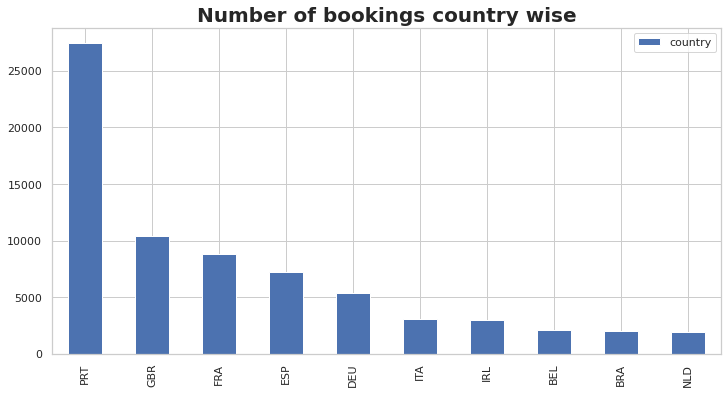

In [ ]:
plt.figure(figsize=(12,6))
countries = df1['country'].value_counts().head(10)
countries.plot(kind = 'bar')
plt.title('Number of bookings country wise',fontweight="bold", size=20)
plt.legend()
plt.show() 



> **Most no. of guest are from Portugal and other Europian contries.**



# ***Year Wise Bookings By Market Segment***

Text(0.5, 1.0, '--Year Wise Bookings By Market Segment--')

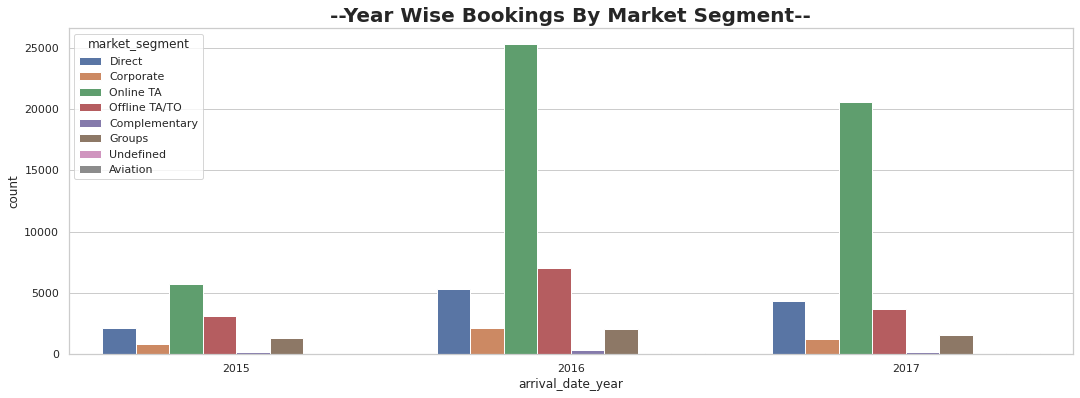

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(hue='market_segment',x='arrival_date_year', data=df1)
plt.title("--Year Wise Bookings By Market Segment--",fontweight="bold", size=20)



> **We Can See From Chart That Most Number Of Booking From Online TA**



# ***Year Wise Bookings Cancelled By Market Segment***

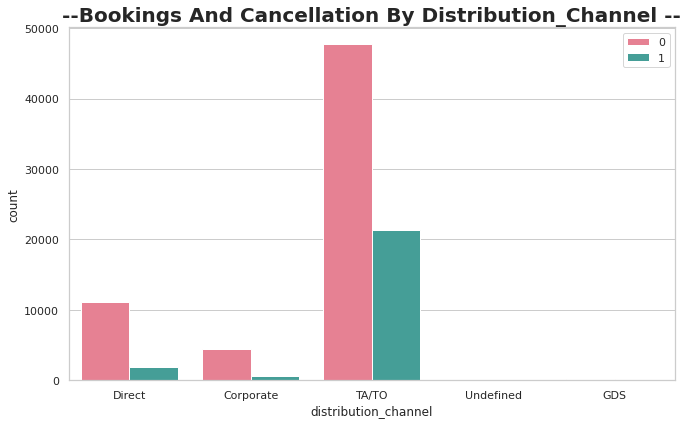

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel',hue='is_canceled' , data=df1,palette='husl')
plt.title("--Bookings And Cancellation By Distribution_Channel --",fontweight="bold", size=20)
plt.legend(loc='upper right')
plt.tight_layout()



> **The channel with the most cancellations is Ta/To**



# ***Percentage of repeated_guest***

In [ ]:
df1['is_repeated_guest'].value_counts()

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

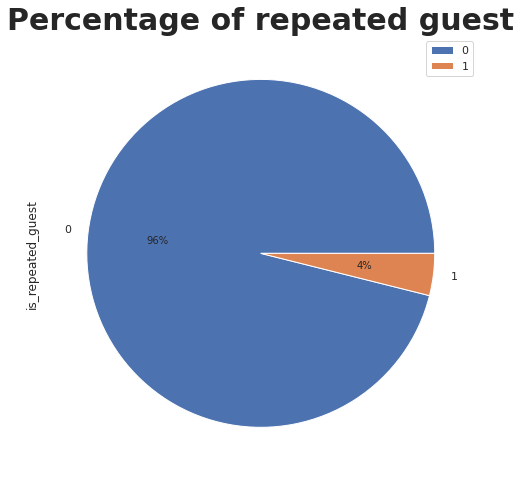

In [ ]:
plt.figure(figsize = (14,8))
df1['is_repeated_guest'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Percentage of repeated guest',fontweight="bold", size=30)
plt.legend()
plt.show()

Asuming
 0 = False, 
 1 = True

***The guest retention rate is 'very low'. Only 4% of guest are Repeating.***

# ***Most preferred Room type***

In [ ]:
x = df1.groupby(['hotel','reserved_room_type'])['assigned_room_type'].count().reset_index()
x

,hotel,reserved_room_type,assigned_room_type
0,City Hotel,A,37942
1,City Hotel,B,996
2,City Hotel,C,14
3,City Hotel,D,10766
4,City Hotel,E,1470
5,City Hotel,F,1757
6,City Hotel,G,479
7,City Hotel,P,4
8,Resort Hotel,A,18610
9,Resort Hotel,B,3


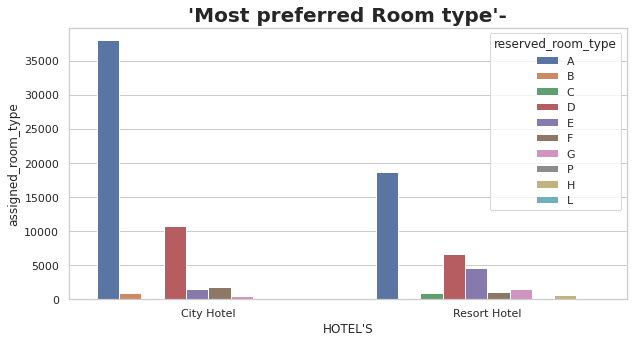

In [ ]:
sns.set_theme(context='notebook', style='whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x = 'hotel',y = 'assigned_room_type', data= x, hue='reserved_room_type')
plt.xlabel("HOTEL'S")
plt.ylabel('assigned_room_type')
plt.title("'Most preferred Room type'-",fontweight="bold", size=20)
plt.show()




> ***Room types A and D are preferred most by guests.***



# ***Customer_Type For Different Hotels***

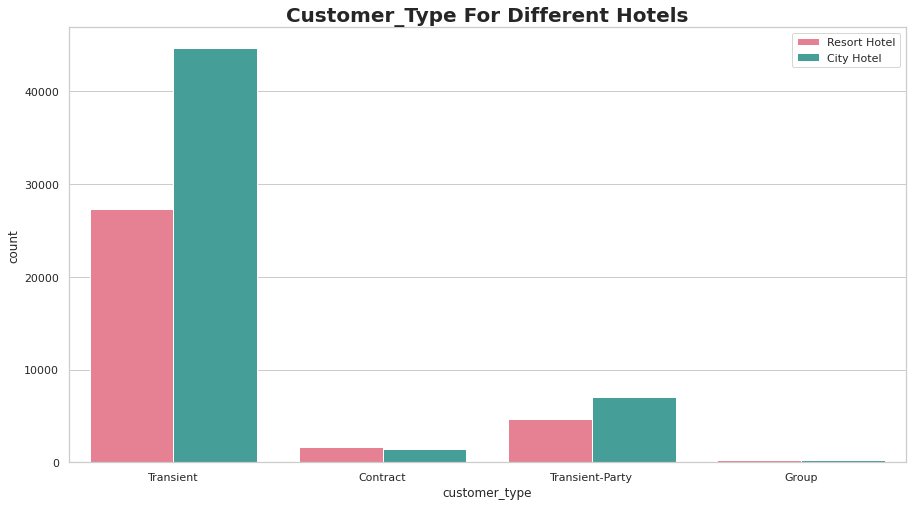

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'customer_type', data = df1,hue = 'hotel',palette='husl')
plt.title('Customer_Type For Different Hotels',fontweight="bold", size=20)
plt.legend()
plt.show()



> **As we can see, most of the transient types customer come**



# ***Here we can see (ADR) outliers***

**ADR - AVERAGE DAILY RATE**

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8dbbb0c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8dbbb02e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8dbbb0be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff8d9c446a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8d9be9b50>],
 'means': []}

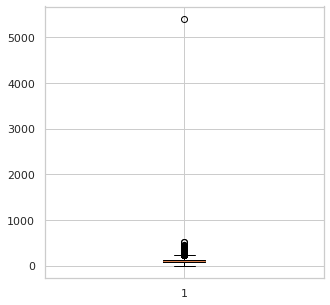

In [ ]:
fig = plt.figure(figsize =(5, 5))
plt.boxplot(df1['adr'])

***We remove the outliers by using conditionals to get and update these values***

In [ ]:

df1.drop(df1[df1['adr'] > 1000].index, inplace = True)


# ***Average Daily Rate (ADR)***

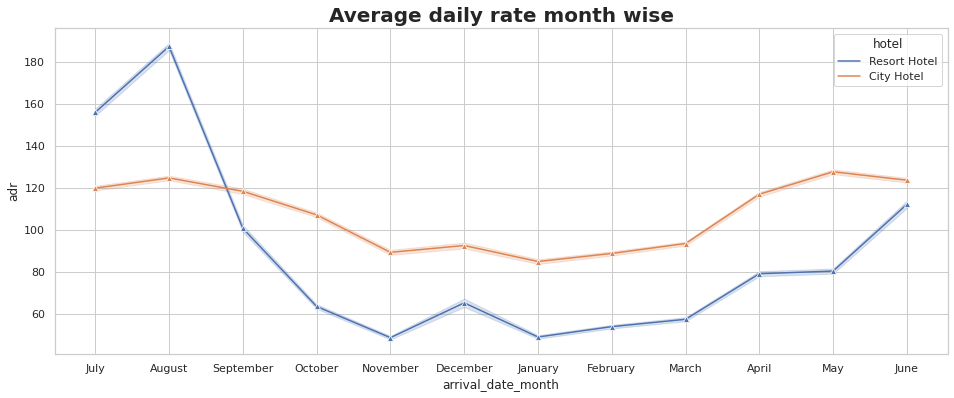

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data = df1, x = 'arrival_date_month', y = 'adr', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontweight ='bold',size =20)
plt.show()



> For city hotels, the average daily rate is more expensive during May, June, July and August
For resort hotels, the average daily rate is more expensive during July, August, and September.
Best time for booking is January



# ***Number of Bookings Month-wise***

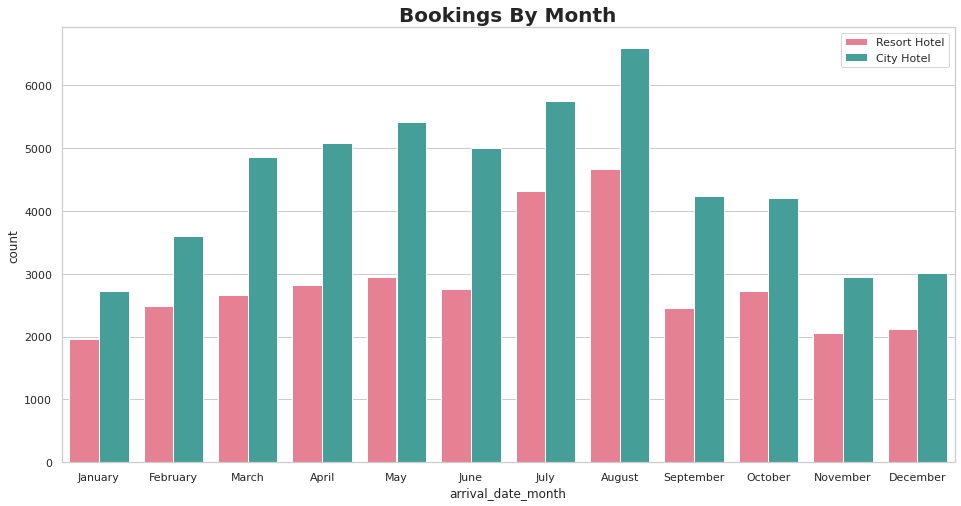

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'], categories=months, ordered=True)
plt.figure(figsize = (16,8))
sns.countplot(x= 'arrival_date_month', data= df1, hue= 'hotel', palette='husl')
plt.title('Bookings By Month',fontweight="bold", size=20)
plt.legend()
plt.show() 



> **Both the hotels have good occupancy in the 2nd and 3rd quarter of the year with 'August' being the highest of all**



# ***Number Of Days Of Stay Vs Customer Type***

In [ ]:
df1['stays_in_weekend_and_weeks'] = df1.stays_in_weekend_nights + df1.stays_in_week_nights

Text(0.5, 1.0, 'Number Of Days Of Stay Vs Customer Type')

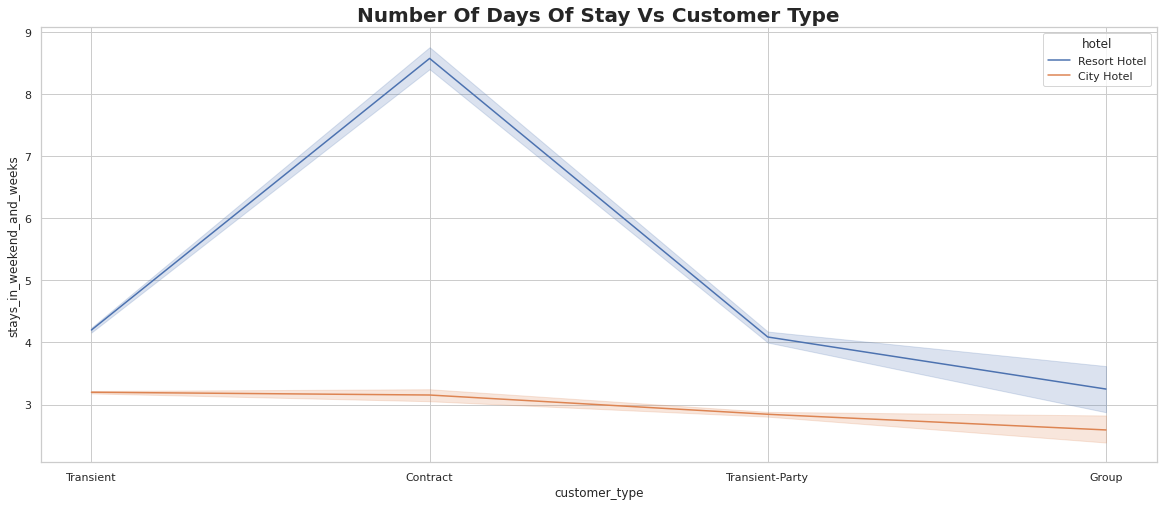

In [ ]:
plt.figure(figsize=(20, 8))
sns.lineplot(data = df1, x ='customer_type',y ='stays_in_weekend_and_weeks', hue = 'hotel')
plt.title("Number Of Days Of Stay Vs Customer Type",fontweight="bold", size=20)





> ***The average stay of a transient customer is 3 to 4 days and the same if the average stay of a contract customer is 8 to 9 days.***





# ***Total members per reservation***

In [ ]:
df1['total_member'] = df1.adults + df1.children + df1.babies

In [ ]:
top_five = df1['total_member'].value_counts().head(5)
top_five

2.0    57053
1.0    16072
3.0    10077
4.0     3870
0.0      166
Name: total_member, dtype: int64

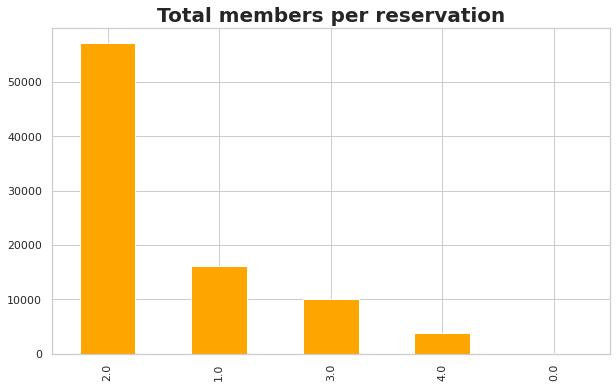

In [ ]:
plt.figure(figsize=(10,6))
top_five.plot(kind = 'bar',color = 'orange')
plt.title('Total members per reservation',fontweight="bold", size=20)
plt.show() 

# ***Reservation Status***




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


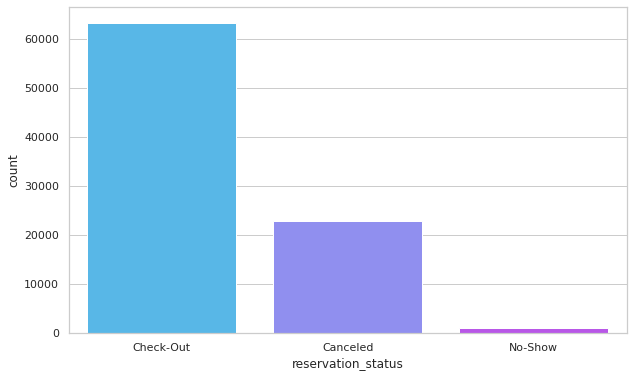

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df1['reservation_status'], palette='cool')
plt.show()

**Reservation last status, assuming one of three categories:**

1. **Canceled** — booking was canceled by the customer;


2. **Check-Out** — customer has checked in but already departed


3. **No-Show** — customer did not check-in and did inform the hotel of the reason why


In [ ]:
df1['is_canceled'].value_counts()

0    63371
1    24024
Name: is_canceled, dtype: int64

# ***Conclusion***



> ***We used the dataset that contains data about hotel bookings.* *We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract infromation from the data.After analysing the dataset we can conclude that:--***




*   *Out of three years 2016 is the busiest for hotels.*
*   *Most no of the bookings are made in the middle part of the year(specifically, July and August) decreasing toward the start and end of the year.*

* *More than 66% of the population booked the city hotel for their stay*

* *Couple(or 2 adults) is the most popular accomodation type.*
* When we Comparison number of days of stay Vs customer Type,we clearly see that Contract Type customer tends to have more days of stay.
* One out of every three bookings are cancelled.
* People prefer to tour more in August.
* Most preferred meal is BB(Bread and Breakfast).
* Online marketing is the best way to attract customers.
* Most of the visitors are number of TWO adults (***couples***).
* Direct bookings have very less cancellation%.
* More and more customers prefer to stay in ***(A)*** and ***(D)*** type rooms
* Most visitors are from these countries: ***Portugal, Britain, France, Spain and Germany.***
* The most prefered is meal '***BB***' type of meal
(BB --bed and breakfast.)
* Both the hotels have good occupancy in the 2nd and 3rd quarter of the year with 'August' being the highest of all and from march to october we had average ***5000 to 7000*** brookings every month
* We had our busiest 2016 in three years

